<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/tweet_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des données

In [ ]:
#changement de dossier
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#chargement des données
import pandas
D = pandas.read_csv("training.1600000.processed.noemoticon.csv",sep=",",names=['polarity','id','date','query','user','tweet'],encoding="UTF",encoding_errors="ignore")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
#distribution des classes
print(D.polarity.value_counts())

0    800000
4    800000
Name: polarity, dtype: int64


In [ ]:
#récupérer les deux colonnes qui nous intéressent
#et n'utiliser qu'une partie des données
DS = D.sample(n=30000,random_state=0)[['polarity','tweet']]

#premières lignes
DS.head()

,polarity,tweet
557138,0,wants to compete! i want hard competition! i w...
349381,0,It seems we are stuck on the ground in Amarill...
182051,0,where the f are my pinking shears? rarararrrar...
571236,0,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER...
1339637,4,@ reply me pls


# Nettoyage des tweets

In [ ]:
#****************************************
#préparation des librairies et des outils
#pour le nettoyage des tweets
#****************************************

#expressions régulières
import re

#ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

#tokénisation
#import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

#lemmatisation
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

#charger les stopwords
#nltk.download('stopwords')
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
print('\n')
print(mots_vides)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'wh

In [ ]:
#fonction pour nettoyage de chaque document
#tweet = corps du tweet = document
#ponctuations : liste des ponctuations
#stopwords : liste des stopwords à retirer
#lem : fonction pour la lemmatisation des termes
def clean_tweet(tweet,ponctuations,stopwords,lem):
    #harmonisation de la casse
    temp = tweet.lower()
    #retirer les contractions en anglais
    temp = re.sub("'", "", temp)
    #retrait des @ (mentions)
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    #retrait des # (hashtags)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    #retrait des liens web (http et https)
    temp = re.sub(r'http\S+', '', temp)
    #retrait des ponctuations
    temp = "".join([char for char in list(temp) if not (char in ponctuations)])
    #retrait des nombres   
    temp = re.sub("[0-9]","", temp)
    #tokenisation
    temp = word_tokenize(temp)
    #lemmatisation des termes
    temp = [lem.lemmatize(mot) for mot in temp]
    #retrait des stopwords
    temp = [mot for mot in temp if not mot in stopwords]
    #retirer les tokens de moins de 3 caractères
    temp = [mot for mot in temp if len(mot) >= 3]    
    #reformer la chaîne
    temp = " ".join(mot for mot in temp)
    return temp

In [ ]:
#appliquer le nettoyage au corpus
corpus = list(DS.tweet)
corpus = [clean_tweet(doc,ponctuations,mots_vides,lem) for doc in corpus]

In [ ]:
#nouveau data frame
DC = pandas.DataFrame({'polarity':(DS.polarity==4).astype('int32'),'tweet':corpus})

#comparaison avant...
DS.head(10)

,polarity,tweet
557138,0,wants to compete! i want hard competition! i w...
349381,0,It seems we are stuck on the ground in Amarill...
182051,0,where the f are my pinking shears? rarararrrar...
571236,0,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER...
1339637,4,@ reply me pls
758738,0,@bharathy_99: Jazz in India is just Honda stra...
1065984,4,"aaaaaaaaaaah, met a boy. he seems nice. im hap..."
1373568,4,@jonasbrothers http://twitpic.com/6q1om - Spor...
1092137,4,"@saragarth Not bad, bit grumpy cause of exams ..."
74877,0,@luke_redroot can't watch it what is it?


In [ ]:
#... et après nettoyage
DC.head(10)

,polarity,tweet
557138,0,want compete want hard competition want rally ...
349381,0,seems stuck ground amarillo put ground stop fl...
182051,0,pinking shear rarararrrarararrbabyproofing cut...
571236,0,meetin hate ppl vlunteer free timegrrr
1339637,1,reply pls
758738,0,jazz india honda strategy prove make affordabl...
1065984,1,aaaaaaaaaaah met boy seems nice happppppy
1373568,1,sport center guy legit quit wooww
1092137,1,bad bit grumpy cause exam generally
74877,0,cant watch


In [ ]:
#des tweets vides après nettoyage ?
print(DC.loc[DC.tweet==""].shape[0])

163


In [ ]:
#retrait des tweets correspondants
DC_ok = DC.loc[DC.tweet != ""]
print(DC_ok.shape)

(29837, 2)


# Analyse des sentiments - Modélisation prédictive

### Subivision apprentissage-test des données

In [ ]:
#partition app-test
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(DC_ok,train_size=0.7,stratify=DC_ok.polarity,random_state=0)

#vérification
print(dfTrain.shape)
print(dfTest.shape)

(20885, 2)
(8952, 2)


In [ ]:
#version de keras
import keras
print(keras.__version__)

2.7.0


### Tokénisation avec Keras - Constitution du dictionnaire

In [ ]:
#tokénisation avec Keras
#num_words = None => sans limitation du nombre de termes à extraire
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=None)

#création du dictionnaire à partir des documents
#de l'échantillon d'apprentissage
tk.fit_on_texts(dfTrain.tweet)

#nombre de documents traités
print(tk.document_count)

20885


In [ ]:
#liste des mots et leurs fréquences
print(list(tk.word_counts.items())[:10])

[('najs', 1), ('watching', 296), ('daft', 3), ('punk', 5), ('intersella', 1), ('right', 341), ('still', 601), ('couple', 53), ('drink', 74), ('couldnt', 86)]


In [ ]:
#liste triée dans l'ordre
#de la fréquence décroissante
print(sorted(list(tk.word_counts.items()),key=lambda x: -x[1])[:10])

[('day', 1383), ('good', 1192), ('get', 1085), ('like', 1023), ('got', 989), ('going', 889), ('love', 880), ('today', 878), ('work', 870), ('dont', 857)]


In [ ]:
#liste des termes avec leur indice
print(list(tk.word_index.items())[:10])

[('day', 1), ('good', 2), ('get', 3), ('like', 4), ('got', 5), ('going', 6), ('love', 7), ('today', 8), ('work', 9), ('dont', 10)]


### Constitution de la matrice documents-termes

In [ ]:
#matrice doc.termes -- TRAIN
#attention, pondération binaire par défaut
#cf. la doc
mTrain = tk.texts_to_matrix(dfTrain.tweet)
print(mTrain.shape)

(20885, 21058)


### Perceptron multicouche - Modélisation prédictive

In [ ]:
#créer un modèle
from keras.models import Sequential
from keras.layers import Dense

#perceptron multicouche à 1 couche cachée
pmc = Sequential()
pmc.add(Dense(units=2,input_dim=mTrain.shape[1],activation="elu"))
pmc.add(Dense(units=1,activation="sigmoid"))

#structure du réseau
print(pmc.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 42118     
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 42,121
Trainable params: 42,121
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#paramétrage de l'algorithme d'apprentissage
pmc.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

#lancement - une partie du train est réservée pour la validation
#c.-à-d. pour un suivi plus réaliste des performances 
history = pmc.fit(mTrain,dfTrain.polarity,epochs=10,validation_split=0.2)

Epoch 1/10
523/523 [==============================] - 2s 4ms/step - loss: 0.6426 - accuracy: 0.6937 - val_loss: 0.5897 - val_accuracy: 0.7357
Epoch 2/10
523/523 [==============================] - 2s 3ms/step - loss: 0.5209 - accuracy: 0.7887 - val_loss: 0.5400 - val_accuracy: 0.7371
Epoch 3/10
523/523 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.8291 - val_loss: 0.5268 - val_accuracy: 0.7386
Epoch 4/10
523/523 [==============================] - 2s 3ms/step - loss: 0.3819 - accuracy: 0.8556 - val_loss: 0.5291 - val_accuracy: 0.7465
Epoch 5/10
523/523 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8775 - val_loss: 0.5385 - val_accuracy: 0.7395
Epoch 6/10
523/523 [==============================] - 2s 3ms/step - loss: 0.2988 - accuracy: 0.8927 - val_loss: 0.5543 - val_accuracy: 0.7417
Epoch 7/10
523/523 [==============================] - 2s 3ms/step - loss: 0.2680 - accuracy: 0.9035 - val_loss: 0.5749 - val_accuracy: 0.7386
Epoch 

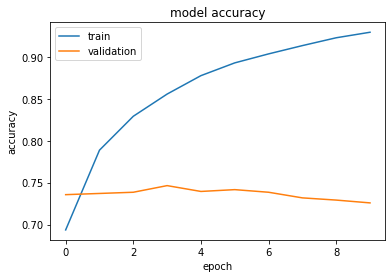

In [ ]:
#graphique accuracy
import matplotlib.pyplot as plt

#évolution de l'accuracy'
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluation sur l'échantillon test

In [ ]:
#matrice documents-termes en TEST
mTest = tk.texts_to_matrix(dfTest.tweet)
print(mTest.shape)

(8952, 21058)


In [ ]:
#évaluation en test avec evaluate()
print(pmc.evaluate(mTest,dfTest.polarity))

280/280 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.7178
[0.6739954352378845, 0.7178283929824829]


In [ ]:
#ou en 2 étapes
#prédiction - proba d'appartenance aux classes
pred = pmc.predict(mTest)
print(pred[:10])

[[0.6696462 ]
 [0.74031   ]
 [0.6953765 ]
 [0.94122034]
 [0.08778971]
 [0.93201953]
 [0.00245383]
 [0.56891775]
 [0.88808525]
 [0.31656337]]


In [ ]:
#matrice de confusion
from sklearn import metrics
metrics.confusion_matrix(dfTest.polarity,pred>0.5)

array([[3151, 1314],
       [1212, 3275]], dtype=int64)

In [ ]:
#accuracy -- même valeur que evaluate() bien sûr
metrics.accuracy_score(dfTest.polarity,pred>0.5)

0.717828418230563

### Représentation intermédiaire des données

In [ ]:
#récupération de la sortie de la couche cachée
#calculée sur l'échantillon test
hidden = keras.backend.function([pmc.layers[0].input],[pmc.layers[0].output])
out_hidden = hidden([mTest])

#vérification des dimensions
print(out_hidden[0].shape)

(8952, 2)


In [ ]:
#associer ces coordonnées à la polarité
import numpy
dfTestHidden = pandas.DataFrame(out_hidden[0],columns=['V1','V2'])
dfTestHidden['polarity'] = numpy.where(dfTest.polarity==1,"pos","neg")

<AxesSubplot:xlabel='V1', ylabel='V2'>

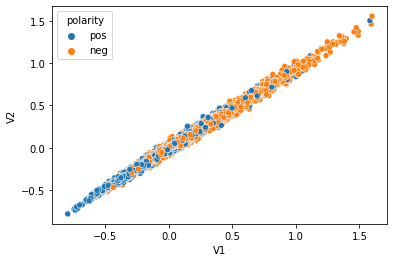

In [ ]:
#seaborn
#séparateur linéaire dans le plan
import seaborn as sns
sns.scatterplot(x='V1',y='V2',hue='polarity',data=dfTestHidden)

## Déploiement sur un document supplémentaire

In [ ]:
#un nouveau tweet
my_tweet = "#lmfao i am sexy and i know it"

In [ ]:
#nettoyage
my_clean = clean_tweet(my_tweet,ponctuations,mots_vides,lem)
print(my_clean)

sexy know


In [ ]:
#transformation en matrice
#avec le dictionnaire élaboré sur l'apprentissage
my_matrix = tk.texts_to_matrix([my_clean])
print(my_matrix.shape)

(1, 21058)


In [ ]:
#prédiction
print(pmc.predict(my_matrix))

[[0.96535957]]
